# pandas-ml-qunat - The Pandas Machine Leraning and Quant Finance Library

This is the root repository of the follwoing 3 core components:

* pandas-ml-common - a more general utilities and monkey patched pandas objects provider
* pandas-ml-quant - provides technical analysis inidcators, plots, loss functions, etc.
* pandas-ml-utils - apply statistical or ml models directly to data frames

## Demonstration of all 3 libraries used together
### First import needed objects

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from pandas_ml_utils.ml.data.extraction import extract_with_post_processor
from pandas_ml_utils.ml.summary import ClassificationSummary
from pandas_ml_utils import FeaturesAndLabels, Model, SkModel
from pandas_ml_quant import pd, np

automatically imported pandas_ml_utils 0.1.0


### Next fetch some stock data and plot it

Note that:
1. all indicators and charting functionalities are behind the **q**and property attached to all pandas objects
1. the **m**achine**l**earning proptery provides access to (raw) data as it is useful/needed by statistical and ml models
1. all model relevant functionalities are behind the **model** property


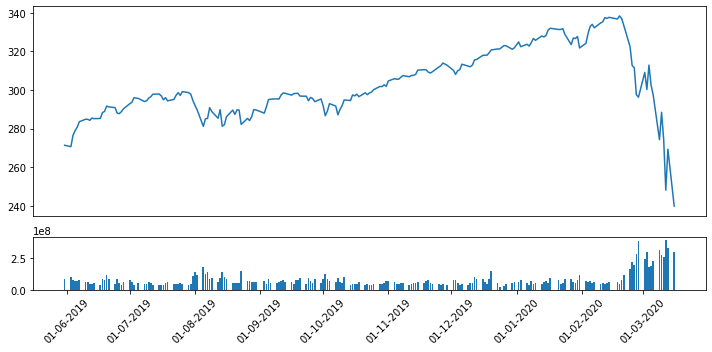

In [10]:
df = pd.fetch_yahoo("SPY").loc[:'2020-03-17']

# NOTE the access to the q_uant property
df[-200:].q.ta_plot(figsize=(10, 5))()

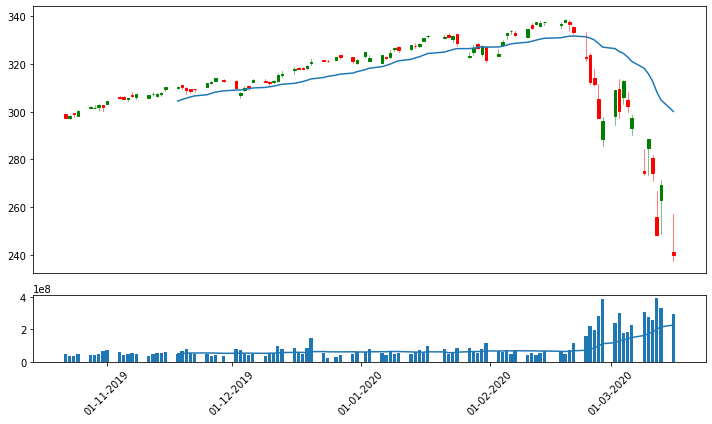

In [3]:
plt = df[-100:].q.ta_plot(figsize=(10, 6))
plt.candlestick()
plt.line(df[-100:]["Close"].q.ta_sma(period=20))
plt.bar("Volume")
plt.line(df[-100:]["Volume"].q.ta_sma(period=20), panel=1)

### Next think of a predictive model
Lets say we want to predict in which quantile of a bolliner bands indicator the price in the future will be:
* 0 means below lower band
* 1 means in the middle band
* 2 means above the upper band


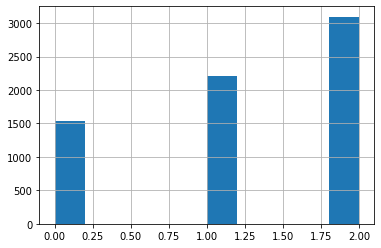

In [4]:
# NOTE all technical analysis starts with the "ta_" prefix
df["Close"].q.ta_future_bband_quantile().hist()

And we want to predict this binary event based on a set of indicators like the RSI (Relative Strength Index) and such.

So we can build up a features and labels definition like so:

In [5]:
fnl = FeaturesAndLabels(
    features=[
        lambda df: df["Close"].q.ta_macd(),
        lambda df: df["Close"].q.ta_apo(),
        lambda df: df["Close"].q.ta_rsi(),
        lambda df: df["Close"].q.ta_roc(),
        lambda df: df["Close"].q.ta_trix(),
        lambda df: df["Close"].q.ta_ppo(),
        lambda df: df["Close"].pct_change().q.ta_zscore() / 4.,
        lambda df: df["Close"].q.ta_week_day(),
        lambda df: df["Close"].q.ta_week(),
        lambda df: df["Close"].q.ta_up_down_volatility_ratio(),
        lambda df: df.q.ta_adx(), 
        lambda df: df.q.ta_atr(),
        lambda df: df.q.ta_tr(),
        lambda df: df.q.ta_williams_R(),
        lambda df: df.q.ta_ultimate_osc(),
        lambda df: df.q.ta_bop(),
        lambda df: df.q.ta_cci(),
    ],
    labels=[
        lambda df: df["Close"].q.ta_future_pct_to_current_mean(14, 5) > 0
    ]
)

# NOTE the df.ml property provides access to (raw) data as it is useful/needed by statistical models
features, labels, targets, weights = df.ml.extract(fnl)
features.describe()

  res = df.rolling(period).apply(lambda c: zscore(c, ddof=ddof)[-1])

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



,"macd_12,26,9","signal_12,26,9","histogram_12,26,9","Close_apo_12,26,0",Close_rsi_14,Close_roc_10,Close_trix_30,"Close_ppo_12,26,1",Close_z_20,dow,...,-DM,+DI,-DI,ADX,atr_14,true_range,williams_R_14,"ultimate_osc_7,14,28",bop,cci_14
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,...,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,0.002438,0.002462,-0.000024,1.002543,0.549286,0.003982,0.036931,0.002438,-0.007646,0.336791,...,0.003472,0.002994,0.002841,0.231616,1.491442,1.517794,0.377793,0.546787,0.035672,0.239781
std,0.010928,0.010213,0.003357,0.015271,0.113859,0.031527,0.104853,0.010928,0.246428,0.233441,...,0.002769,0.002434,0.002135,0.083960,0.955002,1.444685,0.301450,0.101944,0.535303,1.052678
min,-0.074439,-0.067679,-0.026184,0.891753,0.167987,-0.267695,-0.558651,-0.074439,-0.972346,0.000000,...,0.000385,0.000195,0.000205,0.076091,0.147346,0.040000,0.000000,0.213749,-1.000000,-3.522097
25%,-0.002281,-0.001864,-0.001826,0.995333,0.468689,-0.010855,-0.004697,-0.002281,-0.160258,0.166667,...,0.001729,0.001473,0.001468,0.168681,0.906818,0.750000,0.104961,0.474868,-0.418288,-0.568153
50%,0.004360,0.004186,-0.000021,1.004710,0.557260,0.006616,0.053177,0.004360,-0.008163,0.333333,...,0.002673,0.002294,0.002270,0.217168,1.332688,1.200000,0.306600,0.550379,0.052982,0.463474
75%,0.009252,0.008945,0.001735,1.011821,0.634062,0.021489,0.100337,0.009252,0.153027,0.500000,...,0.004238,0.003371,0.003374,0.278959,1.847448,1.860000,0.628326,0.621075,0.500000,1.054951
max,0.030255,0.026989,0.018455,1.059521,0.872283,0.215963,0.248463,0.030255,0.839008,0.666667,...,0.027597,0.015448,0.017921,0.590979,13.752851,31.960000,1.000000,0.846781,1.000000,3.215749


Since we have no idea which features are actually "good" to predict the label, we want to do some feature analysis fist.


  res = df.rolling(period).apply(lambda c: zscore(c, ddof=ddof)[-1])

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



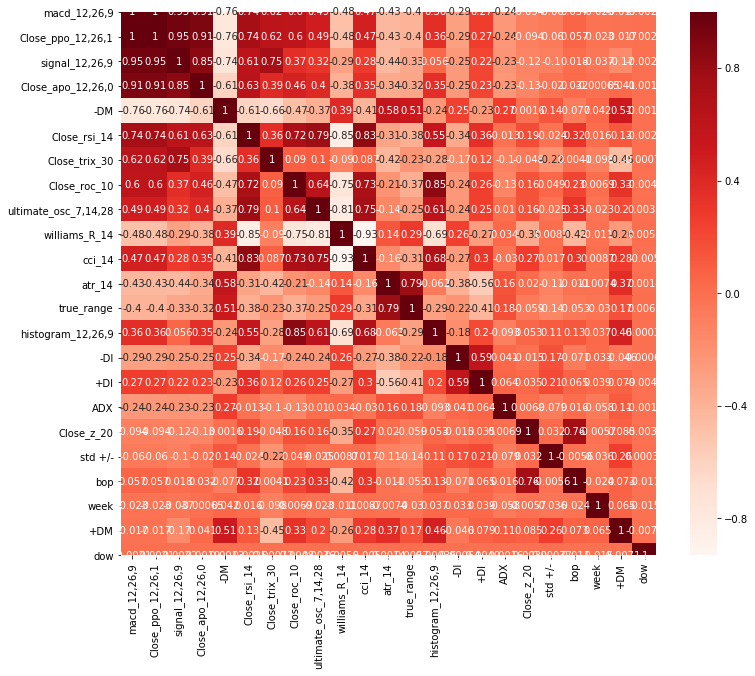

  forest.fit(x, y)



              macd_12,26,9  Close_ppo_12,26,1  signal_12,26,9  \
macd_12,26,9           1.0                1.0        0.951816   

              Close_apo_12,26,0       -DM  Close_rsi_14  Close_trix_30  \
macd_12,26,9           0.906201 -0.761815      0.744644       0.615591   

              Close_roc_10  ultimate_osc_7,14,28  williams_R_14  ...  \
macd_12,26,9      0.603789               0.49064      -0.483853  ...   

              histogram_12,26,9       -DI      +DI       ADX  Close_z_20  \
macd_12,26,9           0.359494 -0.288115  0.26825 -0.240706   -0.093898   

               std +/-       bop      week       +DM      dow  
macd_12,26,9 -0.059564  0.057246 -0.022817 -0.016588 -0.00215  

[1 rows x 23 columns]
label is continuous: False


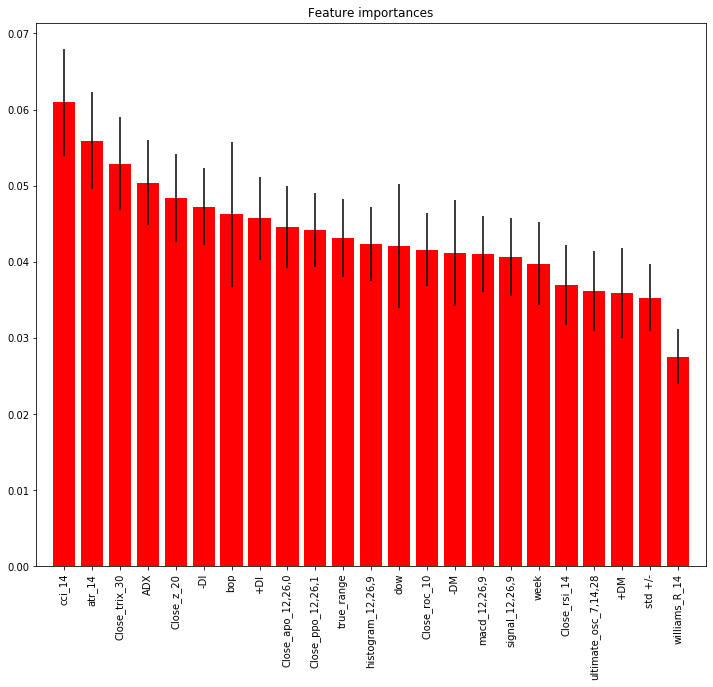

Feature ranking:
['cci_14', 'atr_14', 'Close_trix_30', 'ADX', 'Close_z_20', '-DI', 'bop', '+DI', 'Close_apo_12,26,0', 'Close_ppo_12,26,1', 'true_range', 'histogram_12,26,9', 'dow', 'Close_roc_10', '-DM', 'macd_12,26,9', 'signal_12,26,9', 'week', 'Close_rsi_14', 'ultimate_osc_7,14,28', '+DM', 'std +/-', 'williams_R_14']

TOP 5 features
        cci_14    atr_14  Close_trix_30      ADX  Close_z_20
cci_14     1.0 -0.158819       0.086822 -0.03004    0.272865
Features after correlation filer:
                cci_14  Close_z_20    atr_14  Close_trix_30       ADX
macd_12,26,9  0.466479   -0.093898 -0.427613       0.615591 -0.240706


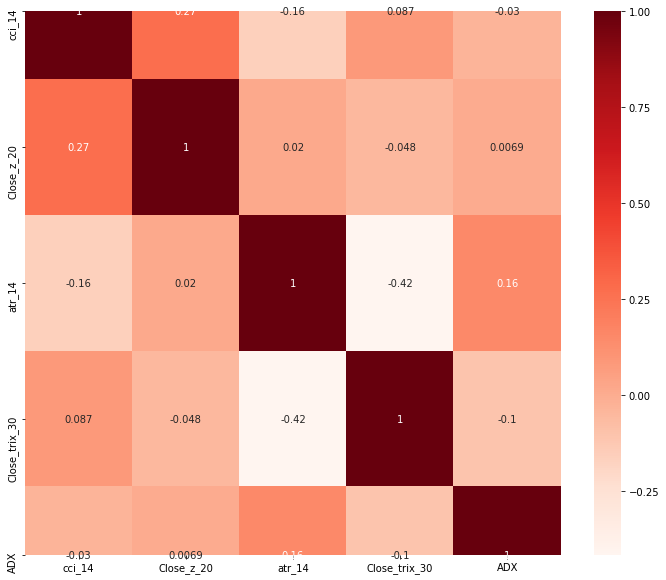

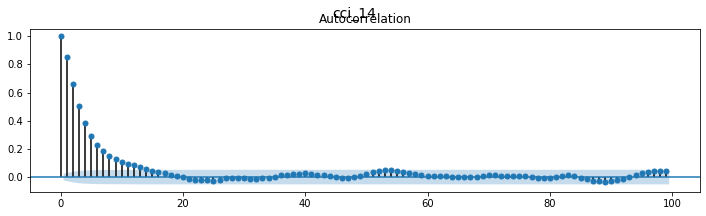

cci_14      1.000000
cci_14_0    1.000000
cci_14_1    0.850495
cci_14_2    0.661005
cci_14_3    0.506624
cci_14_4    0.385464
cci_14_5    0.291106
cci_14_6    0.225772
cci_14_7    0.181836
cci_14_8    0.150558
Name: cci_14, dtype: float64


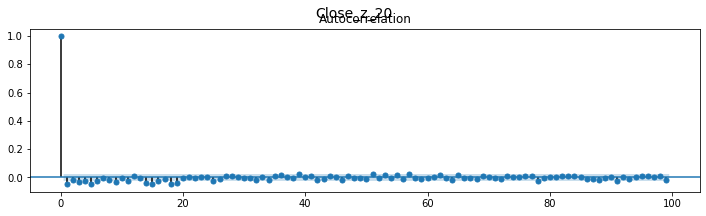

Close_z_20       1.000000
Close_z_20_0     1.000000
Close_z_20_39    0.027765
Close_z_20_51    0.023505
Close_z_20_57    0.023168
Close_z_20_53    0.019912
Close_z_20_62    0.017478
Close_z_20_55    0.016450
Close_z_20_36    0.015052
Close_z_20_65    0.014271
Name: Close_z_20, dtype: float64


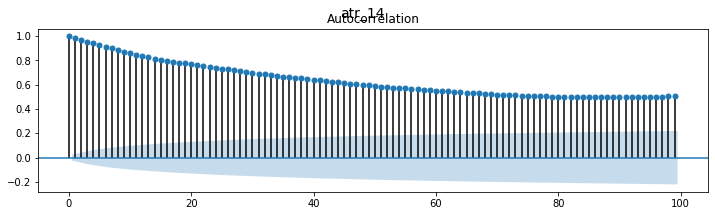

atr_14      1.000000
atr_14_0    1.000000
atr_14_1    0.997371
atr_14_2    0.992738
atr_14_3    0.986292
atr_14_4    0.978671
atr_14_5    0.969940
atr_14_6    0.960194
atr_14_7    0.950391
atr_14_8    0.939970
Name: atr_14, dtype: float64


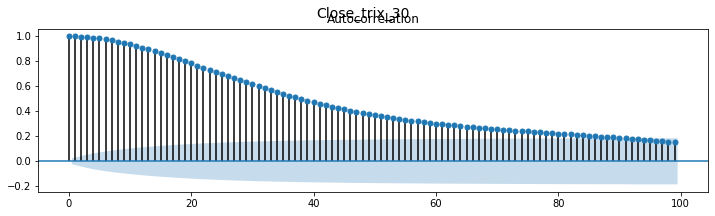

Close_trix_30      1.000000
Close_trix_30_0    1.000000
Close_trix_30_1    0.999267
Close_trix_30_2    0.997086
Close_trix_30_3    0.993495
Close_trix_30_4    0.988543
Close_trix_30_5    0.982290
Close_trix_30_6    0.974800
Close_trix_30_7    0.966146
Close_trix_30_8    0.956399
Name: Close_trix_30, dtype: float64


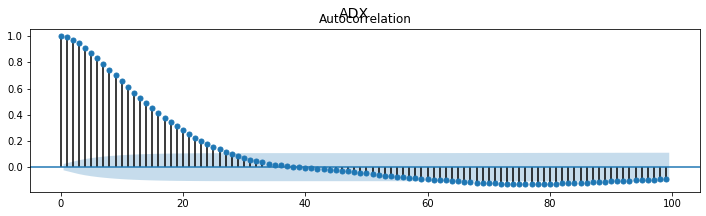

ADX      1.000000
ADX_0    1.000000
ADX_1    0.992813
ADX_2    0.974052
ADX_3    0.946745
ADX_4    0.913142
ADX_5    0.875085
ADX_6    0.834045
ADX_7    0.791134
ADX_8    0.747123
Name: ADX, dtype: float64
best lags are
[(1, '-1.00'), (2, '-0.76'), (3, '-0.72'), (4, '-0.68'), (5, '-0.65'), (6, '-0.61'), (7, '-0.59'), (8, '-0.58'), (9, '-0.56'), (10, '-0.54'), (11, '-0.52'), (12, '-0.50'), (13, '-0.49'), (14, '-0.47'), (15, '-0.45'), (16, '-0.43'), (17, '-0.43'), (18, '-0.41'), (19, '-0.39'), (20, '-0.38'), (21, '-0.38'), (22, '-0.37'), (23, '-0.35'), (24, '-0.35'), (25, '-0.34'), (26, '-0.32'), (27, '-0.32'), (28, '-0.31'), (29, '-0.31'), (30, '-0.30'), (31, '-0.29'), (32, '-0.28'), (33, '-0.27'), (34, '-0.27'), (36, '-0.26'), (37, '-0.26'), (35, '-0.26'), (38, '-0.25'), (40, '-0.25'), (39, '-0.24'), (41, '-0.24'), (42, '-0.24'), (43, '-0.22'), (44, '-0.22'), (45, '-0.22'), (46, '-0.21'), (48, '-0.21'), (47, '-0.20'), (52, '-0.20'), (49, '-0.20'), (50, '-0.20'), (54, '-0.20'), (51, '-0

In [6]:
features, lags = df.model.feature_selection(fnl)

In [7]:
features

['cci_14', 'atr_14', 'Close_trix_30', 'ADX', 'Close_z_20']

Looks like 'cci_14', 'atr_14', 'Close_trix_30', 'ADX', 'Close_z_20' are the top 5 features to predict the label .

So now we can build up a model from the learnings we have made.

In [8]:
from pandas_ml_utils.ml.data.sampeling import KFoldBoostRareEvents, KEquallyWeightEvents

fit = df.model.fit(
    SkModel(
        MLPClassifier(activation='tanh', hidden_layer_sizes=(60, 50), random_state=42),
        FeaturesAndLabels(
            features=extract_with_post_processor(
                [
                    #lambda df: df["Close"].q.ta_macd(),
                    #lambda df: df["Close"].q.ta_apo(),
                    #lambda df: df["Close"].q.ta_rsi(),
                    #lambda df: df["Close"].q.ta_roc(),
                    lambda df: df["Close"].q.ta_trix(),
                    #lambda df: df["Close"].q.ta_ppo(),
                    lambda df: df["Close"].pct_change().q.ta_zscore() / 4.,
                    #lambda df: df["Close"].q.ta_week_day(),
                    #lambda df: df["Close"].q.ta_week(),
                    #lambda df: df["Close"].q.ta_up_down_volatility_ratio(),
                    lambda df: df.q.ta_adx()[["ADX"]], 
                    lambda df: df.q.ta_atr(),
                    #lambda df: df.q.ta_tr(),
                    #lambda df: df.q.ta_williams_R(),
                    #lambda df: df.q.ta_ultimate_osc(),
                    #lambda df: df.q.ta_bop(),
                    lambda df: df.q.ta_cci(),
                ],
                lambda df: df.q.ta_rnn(lags)
            ),
            labels=[
                lambda df: df["Close"].q.ta_future_bband_quantile().q.ta_one_hot_encode_discrete()

            ],
            min_required_samples=max(lags)
        ),
        summary_provider=ClassificationSummary,
    ),
    test_size=0.4, 
    test_validate_split_seed=42, 
)

fit

  res = df.rolling(period).apply(lambda c: zscore(c, ddof=ddof)[-1])

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



Woohooo ... 100% accuracy in the traing-set ... looks like we are a bit overfitting here :-D


In [9]:
from pandas_ml_utils.ml.data.sampeling import KFoldBoostRareEvents, KEquallyWeightEvents
from pandas_ml_utils import KerasModel

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Reshape, ActivityRegularization
from keras.callbacks import EarlyStopping
from keras import backend as K 

# first clear tensorflow session
K.clear_session()

return

def provider():
    # create model
    model = Sequential()
    model.add(Reshape((101 * 11, ), input_shape=(101, 11)))
    # model.add(ActivityRegularization(l1=0.002))
    model.add(Dense(60, activation='tanh'))
    model.add(Dense(50, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='mse',
                  optimizer=Adam(lr=0.0001), 
                  metrics=['accuracy'],
                 )
    
    return model
    
fit = df.model.fit(
    KerasModel(
        provider,
        FeaturesAndLabels(
            features=extract_with_post_processor(
                [
                    lambda df: df.q.ta_cci(),
                    lambda df: df.q.ta_atr(),
                    lambda df: df.q.ta_adx(),
                    lambda df: df["Close"].q.ta_trix(),
                ],
                lambda df: df.q.ta_rnn(lags)
            ),
            labels=[
                lambda df: df["Close"].q.ta_future_pct_to_current_mean(14, 5) > 0

            ],
            min_required_samples=max(lags)
        ),
        summary_provider=ClassificationSummary,
        # keras fit parameters
        verbose=0,
        batch_size=128,
        callbacks=[lambda: EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)], 
    ),
    test_size=0.4, 
    test_validate_split_seed=42, 
    cross_validation=(1, KFoldBoostRareEvents(n_splits=3).split),
    
)

fit

Using TensorFlow backend.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])

  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])

  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

  _np_quint16 = np.dtype([("quint16", np.uint16, 1)])

  _np_qint32 = np.dtype([("qint32", np.int32, 1)])

  np_resource = np.dtype([("resource", np.ubyte, 1)])



SyntaxError: 'return' outside function (<ipython-input-9-1ec3e7833770>, line 13)